In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
# Co-ordinates for polyline that encircles whole of British Isles (since the poly parameter wasn't optional)
# Also for whatever reason, I've included some small islands and not others
# It's only UK data, so it doesn't make a difference if the Republic of Ireland is in the area selected
# (Unless I find that someone has already neatly cut out specific countries and listed the co-ordinates, this is easiest)

# 52.27267915715257, -14.993391359132358
# 49.50147364939204, -6.028548026416367
# 50.06893496075478, 0.2995766790302286
# 51.62260436447764, 3.112076548117596
# 60.934022106199386, 1.354264129937988
# 60.330605478155626, -14.817610117314395

uk_poly = '52.27267915715257,-14.993391359132358:49.50147364939204,-6.028548026416367:50.06893496075478,0.2995766790302286:51.62260436447764,3.112076548117596:60.934022106199386,1.354264129937988:60.330605478155626,-14.817610117314395'                  

In [154]:
import requests

# url = 'https://data.police.uk/api/stops-street?date=2024-01&poly=52.278,0.563:52.794,0.238:52.130,0.478'
url = 'https://data.police.uk/api/stops-street?date=2024-01' + '&poly=' + uk_poly
data = '''{
  "age_range": {}
}'''
response = requests.post(url, data)
json = response.json()
json[:10]

[{'age_range': None,
  'outcome': 'Arrest',
  'involved_person': True,
  'self_defined_ethnicity': 'White - Irish',
  'gender': 'Male',
  'legislation': 'Misuse of Drugs Act 1971 (section 23)',
  'outcome_linked_to_object_of_search': True,
  'datetime': '2024-01-05T23:20:00+00:00',
  'removal_of_more_than_outer_clothing': False,
  'outcome_object': {'id': 'bu-arrest', 'name': 'Arrest'},
  'location': {'latitude': '52.963643',
   'street': {'id': 2247890, 'name': 'On or near Rushworth Close'},
   'longitude': '-1.134338'},
  'operation': False,
  'officer_defined_ethnicity': 'White',
  'type': 'Person search',
  'operation_name': None,
  'object_of_search': 'Controlled drugs'},
 {'age_range': None,
  'outcome': 'A no further action disposal',
  'involved_person': True,
  'self_defined_ethnicity': 'Other ethnic group - Not stated',
  'gender': 'Male',
  'legislation': 'Misuse of Drugs Act 1971 (section 23)',
  'outcome_linked_to_object_of_search': False,
  'datetime': '2024-01-12T18:55:0

In [155]:
df = pd.DataFrame(json)
df.head(15)

,age_range,outcome,involved_person,self_defined_ethnicity,gender,legislation,outcome_linked_to_object_of_search,datetime,removal_of_more_than_outer_clothing,outcome_object,location,operation,officer_defined_ethnicity,type,operation_name,object_of_search
0,None,Arrest,True,White - Irish,Male,Misuse of Drugs Act 1971 (section 23),True,2024-01-05T23:20:00+00:00,False,"{'id': 'bu-arrest', 'name': 'Arrest'}","{'latitude': '52.963643', 'street': {'id': 224...",False,White,Person search,None,Controlled drugs
1,None,A no further action disposal,True,Other ethnic group - Not stated,Male,Misuse of Drugs Act 1971 (section 23),False,2024-01-12T18:55:00+00:00,False,"{'id': 'bu-no-further-action', 'name': 'A no f...","{'latitude': '52.966233', 'street': {'id': 224...",False,None,Person search,None,Controlled drugs
2,None,A no further action disposal,True,Other ethnic group - Not stated,Female,Police and Criminal Evidence Act 1984 (section 1),False,2024-01-01T04:53:00+00:00,False,"{'id': 'bu-no-further-action', 'name': 'A no f...","{'latitude': '52.952222', 'street': {'id': 224...",False,Asian,Person search,None,Article for use in theft
3,None,A no further action disposal,True,White - English/Welsh/Scottish/Northern Irish/...,Male,Misuse of Drugs Act 1971 (section 23),False,2024-01-01T14:26:00+00:00,False,"{'id': 'bu-no-further-action', 'name': 'A no f...","{'latitude': '52.954458', 'street': {'id': 224...",True,White,Person search,None,Controlled drugs
4,None,Arrest,True,Other ethnic group - Not stated,Male,Misuse of Drugs Act 1971 (section 23),True,2024-01-02T15:41:00+00:00,True,"{'id': 'bu-arrest', 'name': 'Arrest'}","{'latitude': '52.978817', 'street': {'id': 224...",False,Black,Person search,None,Controlled drugs
5,None,A no further action disposal,True,White - English/Welsh/Scottish/Northern Irish/...,Male,Police and Criminal Evidence Act 1984 (section 1),False,2024-01-03T04:08:00+00:00,False,"{'id': 'bu-no-further-action', 'name': 'A no f...","{'latitude': '53.004407', 'street': {'id': 224...",False,White,Person search,None,Stolen goods
6,None,Community resolution,True,Other ethnic group - Not stated,Male,Police and Criminal Evidence Act 1984 (section 1),True,2024-01-03T04:10:00+00:00,False,"{'id': 'bu-community-resolution', 'name': 'Com...","{'latitude': '53.003581', 'street': {'id': 224...",False,White,Person search,None,Stolen goods
7,None,A no further action disposal,True,White - English/Welsh/Scottish/Northern Irish/...,Male,Police and Criminal Evidence Act 1984 (section 1),False,2024-01-03T16:30:00+00:00,False,"{'id': 'bu-no-further-action', 'name': 'A no f...","{'latitude': '53.150809', 'street': {'id': 224...",False,White,Person search,None,Offensive weapons
8,None,Community resolution,True,White - English/Welsh/Scottish/Northern Irish/...,Male,Misuse of Drugs Act 1971 (section 23),True,2024-01-03T16:15:00+00:00,False,"{'id': 'bu-community-resolution', 'name': 'Com...","{'latitude': '52.953179', 'street': {'id': 224...",True,White,Person search,None,Controlled drugs
9,None,Arrest,True,Other ethnic group - Not stated,Male,Misuse of Drugs Act 1971 (section 23),True,2024-01-03T16:10:00+00:00,False,"{'id': 'bu-arrest', 'name': 'Arrest'}","{'latitude': '52.953179', 'street': {'id': 224...",True,Other,Person search,None,Controlled drugs


In [156]:
columns = ['officer_defined_ethnicity', 'self_defined_ethnicity', 'type']
df1 = pd.DataFrame(df, columns = columns)
df1.columns = ['Officer_Defined_Ethnicity', 'Self_Defined_Ethnicity', 'Type_Of_Search']
df1.head(30)

,Officer_Defined_Ethnicity,Self_Defined_Ethnicity,Type_Of_Search
0,White,White - Irish,Person search
1,None,Other ethnic group - Not stated,Person search
2,Asian,Other ethnic group - Not stated,Person search
3,White,White - English/Welsh/Scottish/Northern Irish/...,Person search
4,Black,Other ethnic group - Not stated,Person search
5,White,White - English/Welsh/Scottish/Northern Irish/...,Person search
6,White,Other ethnic group - Not stated,Person search
7,White,White - English/Welsh/Scottish/Northern Irish/...,Person search
8,White,White - English/Welsh/Scottish/Northern Irish/...,Person search
9,Other,Other ethnic group - Not stated,Person search


<AxesSubplot:>

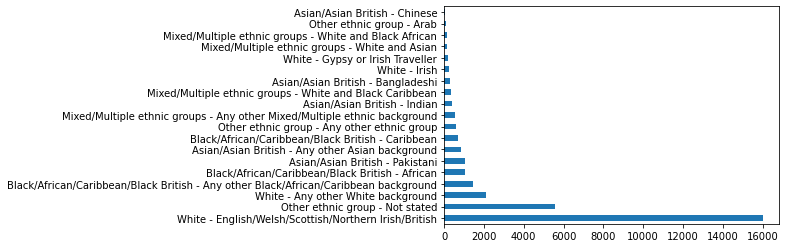

In [157]:
df1['Self_Defined_Ethnicity'].value_counts().plot.barh(x = 'Self_Defined_Ethnicity')
# compare with country's demographics

<AxesSubplot:>

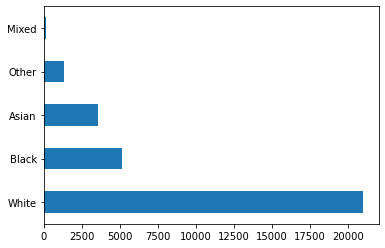

In [158]:
df1['Officer_Defined_Ethnicity'].value_counts().plot.barh(x = 'Officer_Defined_Ethnicity')

In [159]:
# Adjusting the category names so they're more easily comparable
df1['Self_Defined_Ethnicity'] = np.where(df1['Self_Defined_Ethnicity'].str.contains('White - '), 'White', df1['Self_Defined_Ethnicity'])
df1['Self_Defined_Ethnicity'] = np.where(df1['Self_Defined_Ethnicity'].str.contains('Other ethnic group'), 'Other', df1['Self_Defined_Ethnicity'])
df1['Self_Defined_Ethnicity'] = np.where(df1['Self_Defined_Ethnicity'].str.contains('Black/African/Caribbean/Black British'), 'Black', df1['Self_Defined_Ethnicity'])
df1['Self_Defined_Ethnicity'] = np.where(df1['Self_Defined_Ethnicity'].str.contains('Asian/Asian British'), 'Asian', df1['Self_Defined_Ethnicity'])
df1['Self_Defined_Ethnicity'] = np.where(df1['Self_Defined_Ethnicity'].str.contains('Mixed/Multiple ethnic groups'), 'Mixed', df1['Self_Defined_Ethnicity'])

df1.head(30)

,Officer_Defined_Ethnicity,Self_Defined_Ethnicity,Type_Of_Search
0,White,White,Person search
1,None,Other,Person search
2,Asian,Other,Person search
3,White,White,Person search
4,Black,Other,Person search
5,White,White,Person search
6,White,Other,Person search
7,White,White,Person search
8,White,White,Person search
9,Other,Other,Person search


<AxesSubplot:>

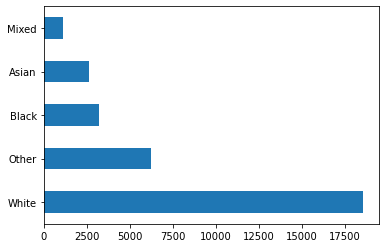

In [160]:
df1['Self_Defined_Ethnicity'].value_counts().plot.barh(x = 'Self_Defined_Ethnicity')

In [161]:
# Look into "Other ethnic group - not stated"
# Is the ethnicity of the person stopped given by the person, or observed by the officer? And if it's the former, does the officer have a chance to change/redact it (e.g. to hide profiling)?

# Having re-read the documentation, this question was already answered.

In [162]:
columns = ['officer_defined_ethnicity', 'self_defined_ethnicity']
df2 = pd.DataFrame(df, columns = columns)
df2.columns = ['Officer_Defined_Ethnicity', 'Self_Defined_Ethnicity']
df2.head(30)

,Officer_Defined_Ethnicity,Self_Defined_Ethnicity
0,White,White - Irish
1,None,Other ethnic group - Not stated
2,Asian,Other ethnic group - Not stated
3,White,White - English/Welsh/Scottish/Northern Irish/...
4,Black,Other ethnic group - Not stated
5,White,White - English/Welsh/Scottish/Northern Irish/...
6,White,Other ethnic group - Not stated
7,White,White - English/Welsh/Scottish/Northern Irish/...
8,White,White - English/Welsh/Scottish/Northern Irish/...
9,Other,Other ethnic group - Not stated


In [163]:
# People categorised as white by officers
df3 = df2.loc[df2['Officer_Defined_Ethnicity'] == 'White']
df3.head(10)

,Officer_Defined_Ethnicity,Self_Defined_Ethnicity
0,White,White - Irish
3,White,White - English/Welsh/Scottish/Northern Irish/...
5,White,White - English/Welsh/Scottish/Northern Irish/...
6,White,Other ethnic group - Not stated
7,White,White - English/Welsh/Scottish/Northern Irish/...
8,White,White - English/Welsh/Scottish/Northern Irish/...
11,White,Other ethnic group - Not stated
12,White,White - English/Welsh/Scottish/Northern Irish/...
13,White,White - English/Welsh/Scottish/Northern Irish/...
18,White,Other ethnic group - Not stated


<AxesSubplot:>

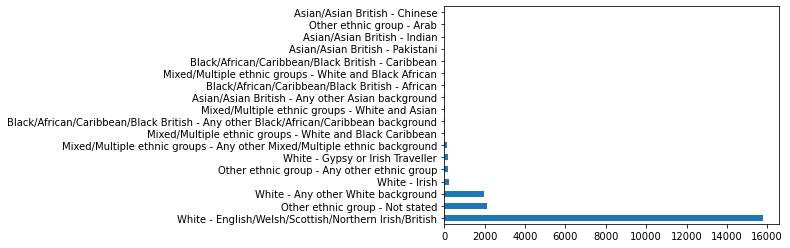

In [164]:
df3['Self_Defined_Ethnicity'].value_counts().plot.barh(x = 'Self_Defined_Ethnicity')

In [165]:
# People categorised as 'other' by officers
df4 = df2.loc[df2['Officer_Defined_Ethnicity'] == 'Other']
df4.head(10)

,Officer_Defined_Ethnicity,Self_Defined_Ethnicity
9,Other,Other ethnic group - Not stated
89,Other,Other ethnic group - Arab
104,Other,Other ethnic group - Not stated
116,Other,Mixed/Multiple ethnic groups - Any other Mixed...
118,Other,Other ethnic group - Not stated
147,Other,Other ethnic group - Not stated
179,Other,White - English/Welsh/Scottish/Northern Irish/...
180,Other,None
212,Other,Other ethnic group - Not stated
222,Other,None


<AxesSubplot:>

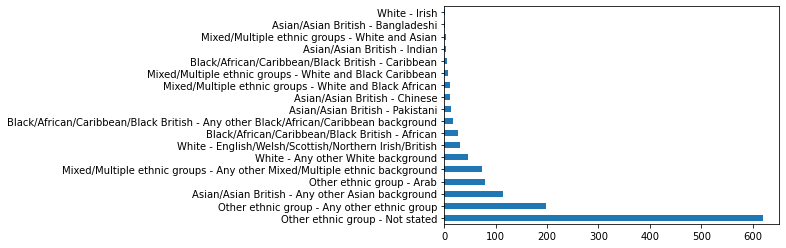

In [166]:
df4['Self_Defined_Ethnicity'].value_counts().plot.barh(x = 'Self_Defined_Ethnicity')